In [131]:
import spacy
import string
from spacy.matcher import Matcher
from spacy.tokens import Token
import pickle as pkl
from collections import Counter

tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation
whitelist = {'cannot','neither','never',\
 'nevertheless',\
 'no',
 'nobody',
 'none',
 'noone',
 'nor',
 'not',
 'nothing','nowhere','unless'}
def change_stopwords(target_list):
    for word in target_list:
        tokenizer.vocab[word].is_stop = False


def tokenize3(sent):
    try:
        tokens = tokenizer(sent)
        result = []
        for token in tokens:
            if (token.is_punct) or (token.is_stop):
                pass
            elif token.lemma_ ==  '-PRON-':
                result.append(token.text.lower())
            else:
                result.append(token.lemma_)
        target_string = ' '.join(result) 
        return re.sub(r'[^\w\s]', '', target_string)
    except (KeyboardInterrupt, SystemExit):
        raise
    except TypeError: 
        pass
    
# remove negation from defaults stop words
change_stopwords(whitelist)

In [1]:
import pandas as pd
tweets1 = pd.read_csv("data/output_2015_06.csv",index_col=False)
tweets1.drop('Unnamed: 0',axis = 1, inplace = True)
texts = tweets1.loc[:, 'without_emoji_text']
print(tokenize3(texts[0]))

In [135]:
# text1_tokenized = list(map(lambda x: tokenize3(x),texts[0:1000000]))
# text2_tokenized = list(map(lambda x: tokenize3(x),texts[1000000:2000000]))
# text3_tokenized = list(map(lambda x: tokenize3(x),texts[2000000:3000000]))
# text4_tokenized = list(map(lambda x: tokenize3(x),texts[3000000:4000000]))
# text5_tokenized = list(map(lambda x: tokenize3(x),texts[4000000:5000000]))
# text6_tokenized = list(map(lambda x: tokenize3(x),texts[5000000:]))
# text_tokenized = text1_tokenized + text2_tokenized + text3_tokenized + text4_tokenized + text5_tokenized + text6_tokenized
# text_tokenized = list(filter(None, text_tokenized))
# with open("201506.pickle", "wb") as output_file:
#     pkl.dump(text_tokenized, output_file)

In [181]:
with open("201506.pickle", "rb") as input_file:
    text_tokenized = pkl.load(input_file)

In [182]:
len(text_tokenized)

5441195

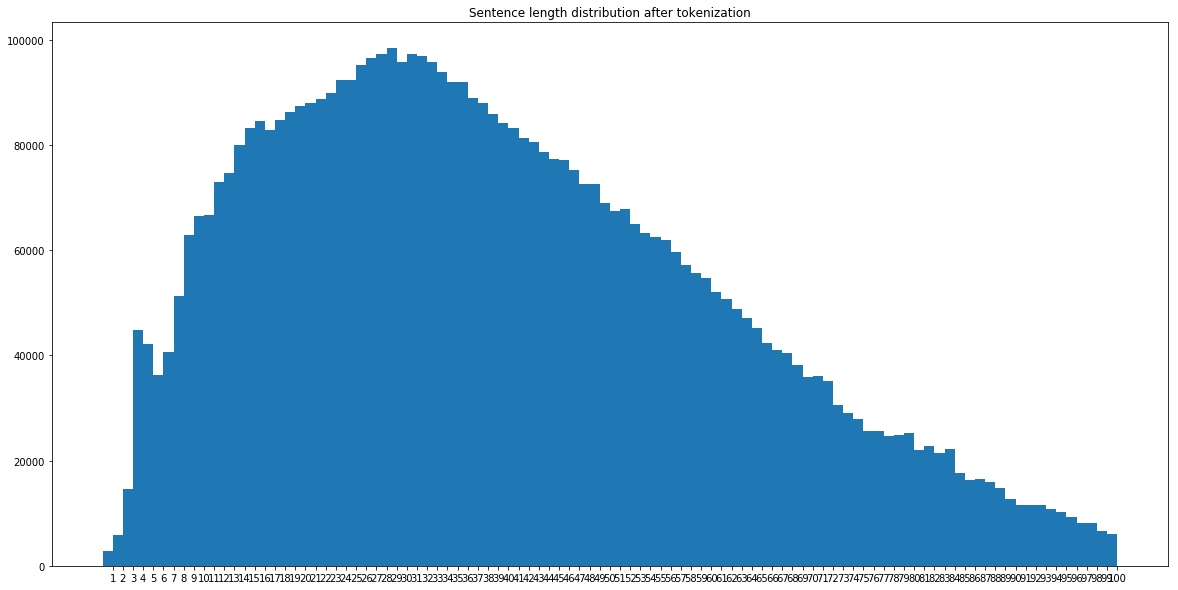

In [232]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
labels, values = zip(*sorted(Counter([len(i) for i in text_tokenized]).items())[0:100])
# labels, values = zip(*sorted(Counter([len(i) for i in text_tokenized]).items())[0:100])
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.title('Sentence length distribution after tokenization')
plt.show()

In [186]:
from sklearn.feature_extraction.text import CountVectorizer
from __future__ import print_function
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 20
n_top_words = 20
n_samples = len(text_tokenized)
n_features = 10000

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features)
t0 = time()
tf = tf_vectorizer.fit_transform(text_tokenized)

print("Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
   % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                             learning_method='online', learning_offset=50.,
                             random_state=0)
t0 = time()
lda.fit(tf)

Fitting LDA models with tf features, n_samples=5441195 and n_features=10000...


/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


done in 3154.021s.

Topics in LDA model:
Topic #0:


TypeError: list indices must be integers or slices, not float

In [208]:
print("done in %0.3fs." % (time() - t0))
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

done in 4937.639s.

Topics in LDA model:
Topic #0:
think tonight ny right big lake school hot high at now win fl west dinner art red damn pic turn
Topic #1:
good amp love have look to need friend go run long amazing drive they road change co hear sunset tho
Topic #2:
be portland birthday girl not feel block say bad he wish she help would pa lose event crazy woman face
Topic #3:
be come ca san little check game make what airport video francisco international father hard finally dad lunch friday movie
Topic #4:
happy man see let police ave party kid se close up yesterday grill line excited rd dude gresham medical dr
Topic #5:
st or of old california los angeles enjoy end north ne mom car hollywood kill report your graffiti museum request
Topic #6:
be not great world start fuck baby sleep pretty eat hate how mean church saturday give celebrate month back hang
Topic #7:
today no mph wind rain humidity gt temperature fall 000 barometer food pressure rise weather 20 steady cloudy 12 00
Topic